# Scrapping  Twitter Pemilu 2024 using tweet-harvers


## Data Gathers Twitter

In [55]:
# # Install Node.js (because tweet-harvest built using Node.js)
# !sudo apt-get update
# !sudo apt-get install -y ca-certificates curl gnupg
# !sudo mkdir -p /etc/apt/keyrings
# !curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

# !NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

# !sudo apt-get update
# !sudo apt-get install nodejs -y

# !node -v

In [56]:
# # Crawl Data

# filename = 'pemilu.csv'
# search_keyword = '#DebatCapres until:2024-01-08 since:2024-01-06'
# limit = 3000

# !npx --yes tweet-harvest@2.2.8 -o "{filename}" -s "{search_keyword}" -l {limit} --token ""

## Import Library

In [57]:
import time

start_time = time.time()

In [58]:
pip install nlp_id

In [59]:
pip install langdetect

In [60]:
import pandas as pd
import nltk, re, string

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn import naive_bayes

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

from nlp_id.lemmatizer import Lemmatizer

from langdetect import detect

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load Dataset

In [61]:
data = pd.read_csv('/content/DataTweetFix - Copy.csv')

display(data)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.760000e+18,Thu Feb 15 14:45:30 +0000 2024,7,Caleg Sistem Paylater Yang Penting DP Dulu... ...,1.760000e+18,https://pbs.twimg.com/media/GGYrc6ubYAAJa8w.jpg,NaN,in,"DKI Jakarta, Indonesia",2,2,2,https://x.com/AchmadAnnama/status/175814048325...,1.196081e+08,AchmadAnnama
1,1.760000e+18,Thu Feb 15 14:51:22 +0000 2024,94,Anies menegaskan misi yang besar itu ialah mem...,1.760000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17581...,NaN,in,"Jakarta, Indonesia",1,5,23,https://x.com/republikaonline/status/175814195...,2.212690e+07,republikaonline
2,1.760000e+18,Thu Feb 15 12:00:02 +0000 2024,0,Link dan cara cek real count pemilu 2024 resmi...,1.760000e+18,https://pbs.twimg.com/amplify_video_thumb/1758...,NaN,in,"Jakarta Capital Region, Indone",0,0,0,https://x.com/medcom_id/status/175809884275753...,9.030000e+17,medcom_id
3,1.760000e+18,Thu Feb 15 13:00:02 +0000 2024,0,Investasinya selama ini gimana nih Pak Hary Ta...,1.760000e+18,https://pbs.twimg.com/media/GGXRfTVakAAzrXr.jpg,NaN,in,"Jakarta, Indonesia",0,1,0,https://x.com/pinterpolitik/status/17581139412...,7.990000e+17,pinterpolitik
4,1.760000e+18,Thu Feb 15 13:00:01 +0000 2024,0,KPU sebut 668 TPS berpotensi melakukan pemungu...,1.760000e+18,https://pbs.twimg.com/amplify_video_thumb/1758...,NaN,in,"Jakarta Capital Region, Indone",0,0,1,https://x.com/medcom_id/status/175811393662737...,9.030000e+17,medcom_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1.800000e+18,Tue May 28 22:37:33 +0000 2024,0,Dari 18 partai politik peserta Pemilu 2024 han...,1.800000e+18,NaN,NaN,in,Jakarta,0,1,0,https://x.com/kompascom/status/179558523007156...,2.334396e+07,kompascom
2079,1.800000e+18,Fri May 31 07:41:14 +0000 2024,2,Kursi Partai di DPRD Sumatera Utara Hasil Pemi...,1.800000e+18,NaN,NaN,in,NaN,1,0,0,https://x.com/CNNIndonesia/status/179644682794...,1.712898e+07,CNNIndonesia
2080,1.800000e+18,Thu May 30 02:29:50 +0000 2024,4,Anggota Parlemen Israel Sebut Netanyahu Gagal ...,1.800000e+18,NaN,NaN,in,"Kota Surabaya, Jawa Timur",0,1,3,https://x.com/e100ss/status/1796006072702136733,8.486146e+08,e100ss
2081,1.800000e+18,Mon May 27 08:12:06 +0000 2024,2,Aswanto mengungkapkan bahwa seseorang mesti me...,1.800000e+18,NaN,NaN,in,Jakarta,0,0,0,https://x.com/kompascom/status/179500504371398...,2.334396e+07,kompascom


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      2083 non-null   float64
 1   created_at               2083 non-null   object 
 2   favorite_count           2083 non-null   int64  
 3   full_text                2083 non-null   object 
 4   id_str                   2083 non-null   float64
 5   image_url                982 non-null    object 
 6   in_reply_to_screen_name  128 non-null    object 
 7   lang                     2083 non-null   object 
 8   location                 1550 non-null   object 
 9   quote_count              2083 non-null   int64  
 10  reply_count              2083 non-null   int64  
 11  retweet_count            2083 non-null   int64  
 12  tweet_url                2083 non-null   object 
 13  user_id_str              2083 non-null   float64
 14  username                

In [63]:
data.shape

(2083, 15)

In [64]:
data.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,1101
in_reply_to_screen_name,1955
lang,0
location,533
quote_count,0


In [65]:
data.duplicated().sum()

394

## Data Cleansing

In [66]:
data['full_text'] = data['full_text'].str.lower()

In [67]:
data = data[['created_at', 'username', 'full_text']]

data.head(10)

,created_at,username,full_text
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater yang penting dp dulu... ...
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies menegaskan misi yang besar itu ialah mem...
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link dan cara cek real count pemilu 2024 resmi...
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasinya selama ini gimana nih pak hary ta...
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu sebut 668 tps berpotensi melakukan pemungu...
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten di gerakan perubahan ganjar pe...
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar soal hasil quick count: suara p...
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,menurut kalian faktor mana nih yang buat prabo...
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta! klik link https://t.co/s6tdyn1yef u...
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati 2 periode suaranya me...


In [68]:
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return 'unknown'

data['Language'] = data['full_text'].apply(detect_language)

data = data[data['Language'] == 'id']

In [69]:
data.head()

,created_at,username,full_text,Language
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater yang penting dp dulu... ...,id
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies menegaskan misi yang besar itu ialah mem...,id
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link dan cara cek real count pemilu 2024 resmi...,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasinya selama ini gimana nih pak hary ta...,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu sebut 668 tps berpotensi melakukan pemungu...,id


## Slang Word Changes

In [70]:
df_slang = pd.read_csv('colloquial-indonesian-lexicon.csv')

def replace_slang(text):
    words = text.split()
    for i in range(len(words)):
        slang_word = df_slang[df_slang['slang'] == words[i]]
        if not slang_word.empty:
            words[i] = slang_word['formal'].values[0]
    return ' '.join(words)

In [71]:
data['full_text'] = data['full_text'].apply(replace_slang)

In [72]:
data.head(10)

,created_at,username,full_text,Language
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater yang penting dp dulu... ...,id
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies menegaskan misi yang besar itu ialah mem...,id
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link dan cara cek real count pemilu 2024 resmi...,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasinya selama ini bagaimana nih pak hary...,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu sebut 668 tps berpotensi melakukan pemungu...,id
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten di gerakan perubahan ganjar pe...,id
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar soal hasil quick count: suara p...,id
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,menurut kalian faktor mana nih yang buat prabo...,id
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta! klik link https://t.co/s6tdyn1yef u...,id
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati 2 periode suaranya me...,id


## Data Pre-Processing

In [73]:
def remove_tweet_special(text):
    # Menghapus tab, baris baru, dan back slice
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', '')

    # Menghapus karakter non-ASCII (emotikon, huruf Cina, dll.)
    text = ''.join(char for char in text if ord(char) < 128)

    # Menghapus mention, link, dan hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())

    # Menghapus URL yang tidak lengkap
    text = text.replace("http://", " ").replace("https://", " ")

    return text

def clean_text(data):
    # Menghapus karakter yang tidak diinginkan (_) dan karakter selain huruf
    data['full_text'] = data['full_text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

    # Mengganti multiple whitespace dengan single whitespace
    data['full_text'] = data['full_text'].replace(" +", " ", regex=True)

    return data

data['full_text'] = data['full_text'].apply(remove_tweet_special)

data = clean_text(data)


In [74]:
%pip install --user -U nltk

In [75]:
import nltk
nltk.download('tokenize')


[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index


False

In [76]:
import nltk
def clean_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

lemmatizer = Lemmatizer()

def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [77]:
def clean_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

lemmatizer = Lemmatizer()

def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    return ' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in stop_words])

data['full_text'] = data['full_text'].apply(lambda x: x.lower())

data['full_text'] = data['full_text'].apply(clean_punctuation)

data['full_text'] = data['full_text'].apply(lemmatize_text)

data['full_text'] = data['full_text'].apply(remove_numbers)

data['full_text'] = data['full_text'].apply(remove_stopwords)

In [78]:
data.head(10)

,created_at,username,full_text,Language
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater dp hehehehe,id
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies misi bangun demokrasi indonesia junjung ...,id
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link cek real count milu resmi kpu,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasi nih hary tanoe,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu tps potensi laku pungut suara susul,id
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten gerak ubah ganjar hasil quick ...,id
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar hasil quick count suara pdip,id
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,faktor nih prabowogibran menang share kolom ko...,id
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta klik link cek fakta informasi saji yuk,id
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati periode suara jura ja...,id


## Negative and Positive Word

In [79]:
file_negative = 'negative.tsv'
file_positive = 'positive.tsv'

data_negative = pd.read_csv(file_negative, sep='\t')
data_positive = pd.read_csv(file_positive, sep='\t')

# Tambahkan kolom label sentimen
data_negative['sentiment'] = 'negative'
data_positive['sentiment'] = 'positive'

# Gabungkan dataset negative dan positive menjadi satu dataset
data_combined = pd.concat([data_negative, data_positive], ignore_index=True)

# Tampilkan beberapa contoh data
data_combined.head(10)


,word,weight,sentiment
0,putus tali gantung,-2,negative
1,gelebah,-2,negative
2,gobar hati,-2,negative
3,tersentuh (perasaan),-1,negative
4,isak,-5,negative
5,larat hati,-3,negative
6,nelangsa,-3,negative
7,remuk redam,-5,negative
8,tidak segan,-2,negative
9,gemar,-1,negative


In [80]:
word_weight_dict = dict(zip(data_combined['word'], data_combined['weight']))

def determine_sentiment(word):
    if word in word_weight_dict:
        if word_weight_dict[word] < 0:
            return 'negatif'
        elif word_weight_dict[word] > 0:
            return 'positif'
    return 'netral'

In [81]:
data.head(10)

,created_at,username,full_text,Language
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater dp hehehehe,id
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies misi bangun demokrasi indonesia junjung ...,id
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link cek real count milu resmi kpu,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasi nih hary tanoe,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu tps potensi laku pungut suara susul,id
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten gerak ubah ganjar hasil quick ...,id
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar hasil quick count suara pdip,id
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,faktor nih prabowogibran menang share kolom ko...,id
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta klik link cek fakta informasi saji yuk,id
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati periode suara jura ja...,id


## Labeling data

In [82]:
def test_sentiment(data):
    data['sentiment'] = data['full_text'].apply(lambda x: [determine_sentiment(word) for word in x.split()])
    return data

def calculate_text_weight(text):
    total_weight = 0
    words = text.split()
    for word in words:
        if word in word_weight_dict:
            total_weight += word_weight_dict[word]
    return total_weight

data['text_weight'] = data['full_text'].apply(calculate_text_weight)

data = test_sentiment(data)

data.head(10)

,created_at,username,full_text,Language,text_weight,sentiment
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater dp hehehehe,id,-4,"[netral, negatif, netral, netral, netral]"
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies misi bangun demokrasi indonesia junjung ...,id,0,"[netral, netral, netral, netral, netral, negat..."
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link cek real count milu resmi kpu,id,0,"[netral, negatif, positif, netral, netral, pos..."
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasi nih hary tanoe,id,0,"[netral, netral, netral, netral]"
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu tps potensi laku pungut suara susul,id,5,"[netral, netral, positif, netral, netral, posi..."
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten gerak ubah ganjar hasil quick ...,id,8,"[netral, netral, netral, netral, positif, posi..."
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar hasil quick count suara pdip,id,13,"[positif, positif, positif, netral, netral, po..."
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,faktor nih prabowogibran menang share kolom ko...,id,4,"[negatif, netral, netral, positif, netral, net..."
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta klik link cek fakta informasi saji yuk,id,-4,"[negatif, negatif, netral, netral, negatif, ne..."
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati periode suara jura ja...,id,0,"[negatif, negatif, netral, positif, netral, po..."


In [83]:
data['class_sentiment'] = data['text_weight'].apply(lambda x: 'negatif' if x < 0 else ('positif' if x > 0 else 'netral'))

In [84]:
data['text_weight_label'] = data['text_weight'].apply(lambda x: 0 if x < 0 else 1)

In [85]:
data = data[['full_text', 'text_weight', 'text_weight_label', 'class_sentiment']]

data.head(10)


,full_text,text_weight,text_weight_label,class_sentiment
0,caleg sistem paylater dp hehehehe,-4,0,negatif
1,anies misi bangun demokrasi indonesia junjung ...,0,1,netral
2,link cek real count milu resmi kpu,0,1,netral
3,investasi nih hary tanoe,0,1,netral
4,kpu tps potensi laku pungut suara susul,5,1,positif
5,anies konsisten gerak ubah ganjar hasil quick ...,8,1,positif
6,respons ganjar hasil quick count suara pdip,13,1,positif
7,faktor nih prabowogibran menang share kolom ko...,4,1,positif
8,cek fakta klik link cek fakta informasi saji yuk,-4,0,negatif
9,anjay mantan bupati pati periode suara jura ja...,0,1,netral


In [86]:
all_tweets = ' '.join(data['full_text'])

# Mencetak beberapa karakter pertama untuk memverifikasi
print("Gabungan tweet (200 karakter pertama):")
print(all_tweets[:200])

# Mencetak total jumlah karakter
print(f"\nTotal jumlah karakter: {len(all_tweets)}")

# Mencetak jumlah kata unik
unique_words = set(all_tweets.split())
print(f"Jumlah kata unik: {len(unique_words)}")

Gabungan tweet (200 karakter pertama):
caleg sistem paylater dp hehehehe anies misi bangun demokrasi indonesia junjung etika adab demokrasi ruang hormat gagas ide dialog berita lengkap baca link cek real count milu resmi kpu investasi nih 

Total jumlah karakter: 178724
Jumlah kata unik: 4004


In [87]:
with open('all_tweets.txt', 'w', encoding='utf-8') as f:
    f.write(all_tweets)

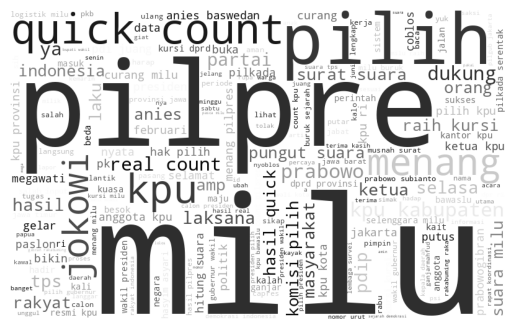

In [88]:
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

wc = WordCloud(background_color='white', colormap = 'binary',
     stopwords = ['meta'], width = 800, height = 500).generate(all_tweets)
plt.axis("off")
plt.imshow(wc)

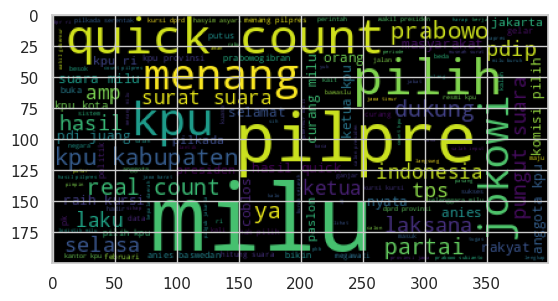

In [89]:
wc = WordCloud().generate(all_tweets)
plt.imshow(wc)

<ipython-input-90-35d0a85d0859>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(words, rotation=90)


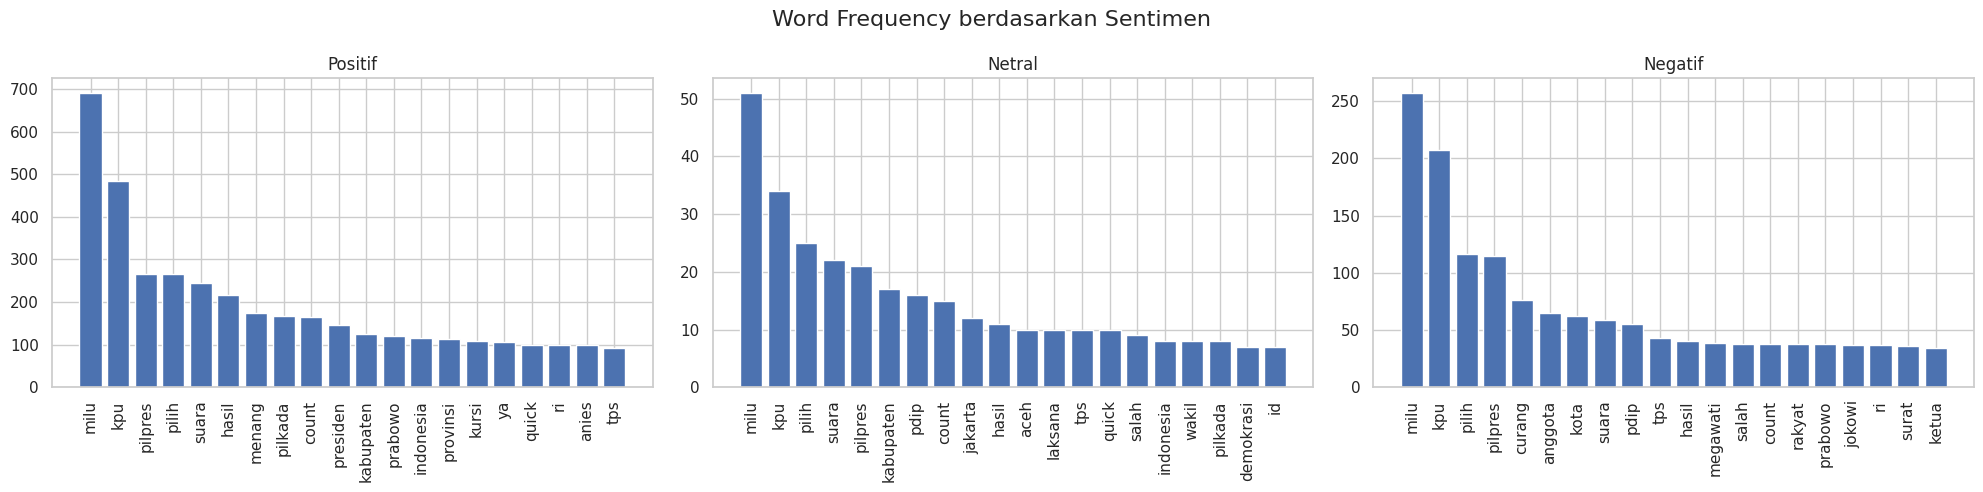

In [90]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np



# Gabungkan semua tweet menjadi satu string
all_tweets = ' '.join(data['full_text'])


# Buat visualisasi untuk setiap sentimen
sentiments = ['positif', 'netral', 'negatif']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Word Frequency berdasarkan Sentimen', fontsize=16)

for i, sentiment in enumerate(sentiments):
    tweets_by_sentiment = ' '.join(data[data['class_sentiment'] == sentiment]['full_text'])

    # Hitung frekuensi kata
    words = tweets_by_sentiment.split()
    word_counts = Counter(words).most_common(20)

    words, counts = zip(*word_counts)

    axes[i].bar(words, counts)
    axes[i].set_title(sentiment.capitalize())
    axes[i].set_xticklabels(words, rotation=90)

plt.tight_layout()
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'positif'), Text(1, 0, 'negatif'), Text(2, 0, 'netral')])

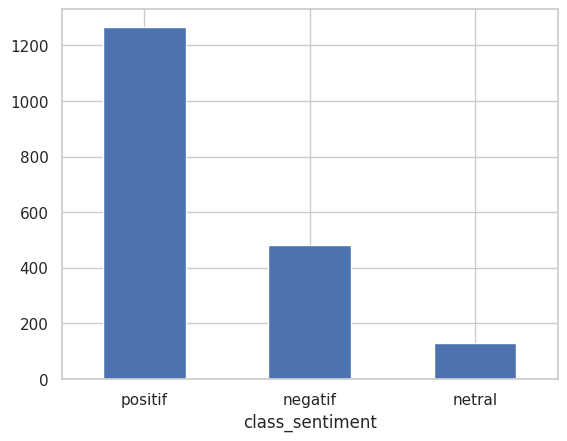

In [91]:
data['class_sentiment'].value_counts().plot(kind='bar')

plt.xticks(rotation=0)

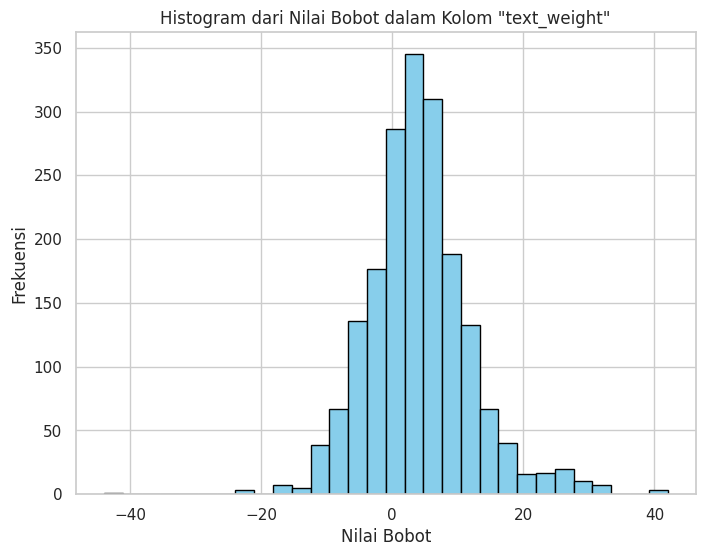

In [92]:
plt.figure(figsize=(8, 6))
plt.hist(data['text_weight'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram dari Nilai Bobot dalam Kolom "text_weight"')
plt.xlabel('Nilai Bobot')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

<ipython-input-93-06554c92b47c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_count.keys()), y=list(positive_count.values()), palette='Blues_d')


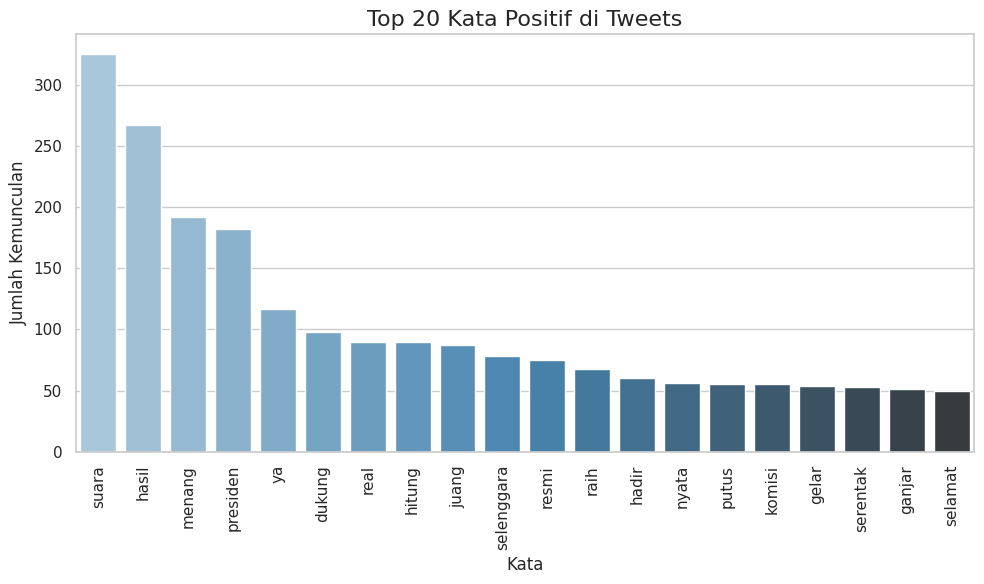

<ipython-input-93-06554c92b47c>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_count.keys()), y=list(negative_count.values()), palette='Reds_d')


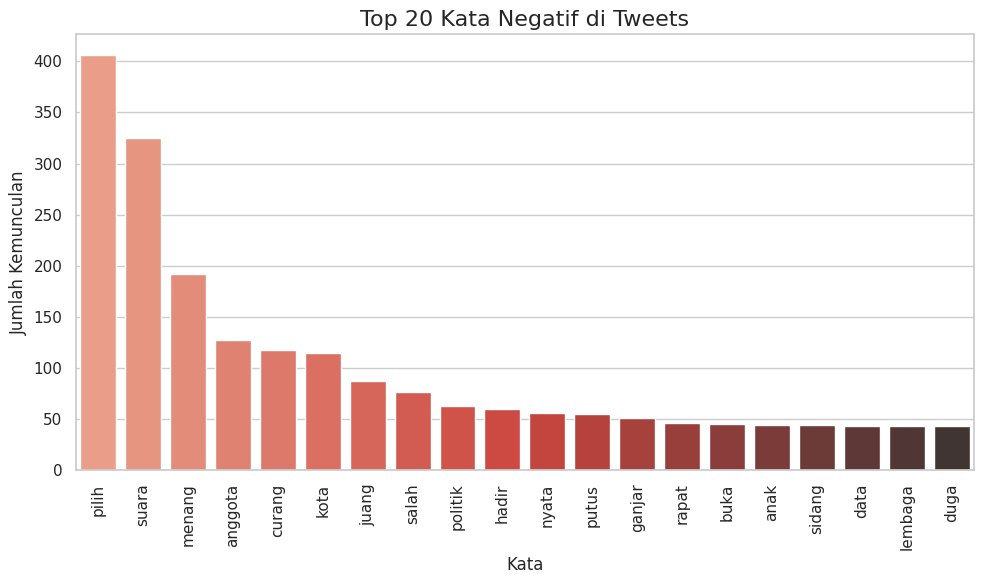

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



# Buat list kata-kata positif dan negatif
positive_words = data_positive['word'].tolist()  # pastikan ada kolom 'word'
negative_words = data_negative['word'].tolist()

# Pisahkan kata dalam all_tweets
words = all_tweets.split()

# Hitung kemunculan setiap kata dalam tweets
word_count = Counter(words)

# Buat dictionary untuk menyimpan jumlah kata positif dan negatif
positive_count = {word: count for word, count in word_count.items() if word in positive_words}
negative_count = {word: count for word, count in word_count.items() if word in negative_words}

# Sortir berdasarkan frekuensi tertinggi dan ambil 20 kata teratas
positive_count = dict(sorted(positive_count.items(), key=lambda item: item[1], reverse=True)[:20])
negative_count = dict(sorted(negative_count.items(), key=lambda item: item[1], reverse=True)[:20])

# Set gaya seaborn
sns.set(style="whitegrid")

# Plot bar chart kata-kata positif menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(positive_count.keys()), y=list(positive_count.values()), palette='Blues_d')
plt.title('Top 20 Kata Positif di Tweets', fontsize=16)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Jumlah Kemunculan', fontsize=12)
plt.xticks(rotation=90)  # Rotasi label kata agar terbaca
plt.tight_layout()
plt.show()

# Plot bar chart kata-kata negatif menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(negative_count.keys()), y=list(negative_count.values()), palette='Reds_d')
plt.title('Top 20 Kata Negatif di Tweets', fontsize=16)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Jumlah Kemunculan', fontsize=12)
plt.xticks(rotation=90)  # Rotasi label kata agar terbaca
plt.tight_layout()
plt.show()


## Train and Test Split

In [94]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data['full_text'], data['class_sentiment'], test_size=0.2, shuffle=True)

In [95]:
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')

tokenizer.fit_on_texts(data['full_text'])

# Konversi teks menjadi sequence
data_sequences = tokenizer.texts_to_sequences(data['full_text'])

padded_train = pad_sequences(data_sequences)

# Menampilkan hasil sequence
print(padded_train)

# tokenizer.fit_on_texts(Train_X)
# tokenizer.fit_on_texts(Test_X)

# sekuens_train = tokenizer.texts_to_sequences(Train_X)
# sekuens_test = tokenizer.texts_to_sequences(Test_X)

# padded_train = pad_sequences(sekuens_train)
# padded_test = pad_sequences(sekuens_test)

[[   0    0    0 ... 2470 1563 2471]
 [   0    0    0 ...  248  201  190]
 [   0    0    0 ...    2   46    3]
 ...
 [   0    0    0 ...  327 1411    2]
 [   0    0    0 ...   93   43    2]
 [   0    0    0 ... 1000    2  219]]


In [96]:
print(f'Jumlah data dalam train set: {len(Train_X)}')
print(f'Jumlah data dalam validation set: {len(Test_X)}')
print(f'Jumlah data dalam train set: {len(Train_Y)}')
print(f'Jumlah data dalam validation set: {len(Test_Y)}')

Jumlah data dalam train set: 1501
Jumlah data dalam validation set: 376
Jumlah data dalam train set: 1501
Jumlah data dalam validation set: 376


## Vectorization

In [97]:
Encoder = LabelEncoder()

Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [98]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['full_text'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Train_X.head()

,full_text
652,tps cigondewah kaler kota bandung prabowo sire...
1080,s ratus harga nasbhkn internasional nafsu anie...
1242,kudus mei kpu provinsi jawa hadir acara luncur...
1931,juara milu pdi juang provinsi jawa raih kursi ...
1224,anggota kpu idham holik hadir narasumber rapat...


In [99]:
data['class_sentiment'].unique()

array(['negatif', 'netral', 'positif'], dtype=object)

In [100]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE

X = data['full_text']
y = data['class_sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)

# Definisikan model dan parameter grid
models = {
    'Naive Bayes': naive_bayes.MultinomialNB()
}

param_grids = {
    'Naive Bayes': {'alpha': [0.1, 0.5, 1.0]}
}

# Grid Search dan evaluasi
best_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_models[name] = grid_search.best_estimator_

    y_pred = best_models[name].predict(X_test_Tfidf)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



Naive Bayes Accuracy: 0.7819
              precision    recall  f1-score   support

     negatif       0.81      0.59      0.68       113
      netral       0.24      0.33      0.28        18
     positif       0.82      0.90      0.86       245

    accuracy                           0.78       376
   macro avg       0.62      0.61      0.61       376
weighted avg       0.79      0.78      0.78       376



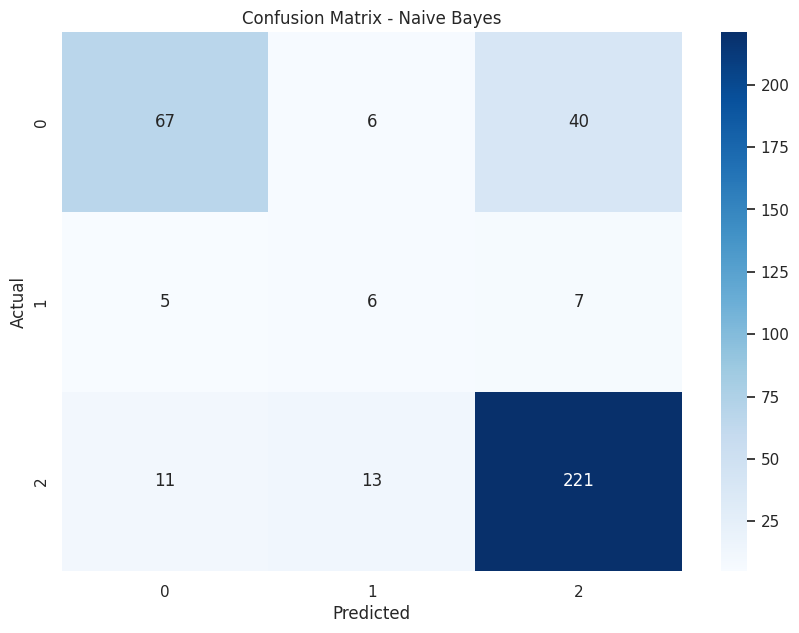

In [112]:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Display normalized confusion matrix


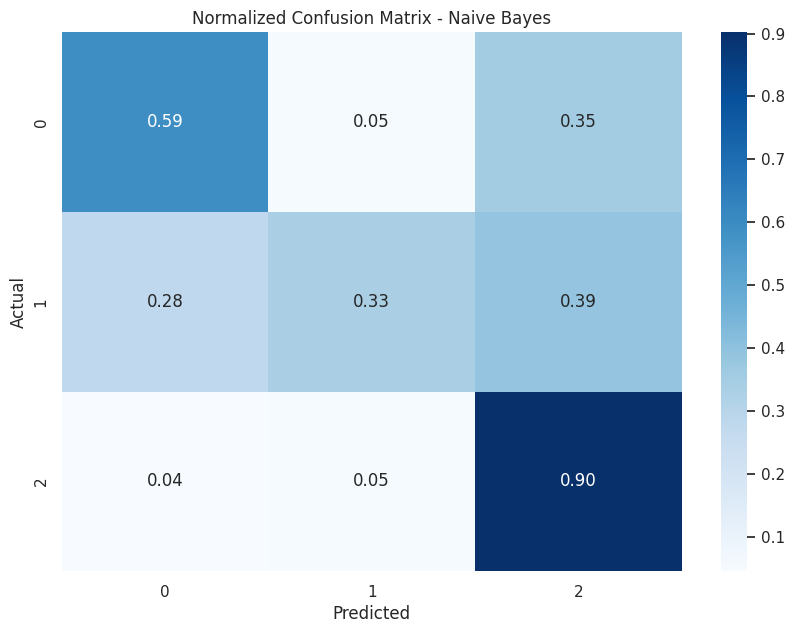

In [113]:
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  plt.figure(figsize=(10,7))
  sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
  plt.title(f'Normalized Confusion Matrix - {name}')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

In [101]:
import joblib

joblib.dump(best_models['Naive Bayes'], 'best_model.joblib')
joblib.dump(X_test_Tfidf, 'X_test_Tfidf.joblib')

['X_test_Tfidf.joblib']

In [102]:
from sklearn.model_selection import cross_val_score

# Definisikan model
model = naive_bayes.MultinomialNB()

# Lakukan validasi silang 10 kali
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Tampilkan hasil per fold
print("Hasil akurasi per fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.4f}")

# Tampilkan rata-rata akurasi
print(f"\nRata-rata akurasi: {scores.mean():.4f}")

Hasil akurasi per fold:
Fold 1: 0.8469
Fold 2: 0.9023
Fold 3: 0.8762
Fold 4: 0.8529
Fold 5: 0.9052
Fold 6: 0.8954
Fold 7: 0.9020
Fold 8: 0.8922
Fold 9: 0.8954
Fold 10: 0.8954

Rata-rata akurasi: 0.8864


In [103]:
#save excel
data.to_csv('/content/sentimentt.csv', index=False)

#read excel file


In [104]:
import joblib

joblib.dump(model,'model.joblib')

['model.joblib']

## Klasifikasi

## Evaluasi

[[ 24   1   0]
 [  0   0   0]
 [ 78  21 252]]
Classification:                precision    recall  f1-score   support

           0       0.96      0.24      0.38       102
           1       0.00      0.00      0.00        22
           2       0.72      1.00      0.84       252

    accuracy                           0.73       376
   macro avg       0.56      0.41      0.40       376
weighted avg       0.74      0.73      0.66       376

Naive Bayes Accuracy Score ->  0.7340425531914894


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


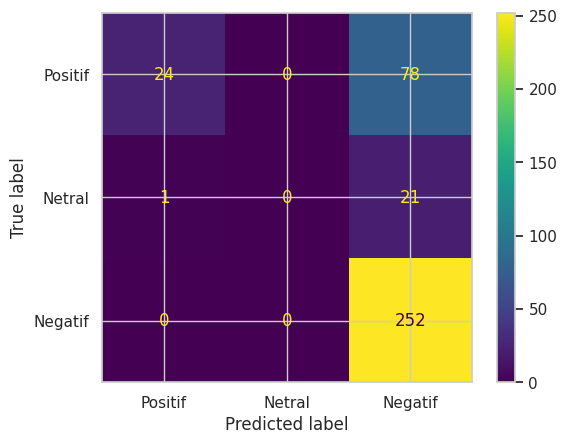

In [105]:
model.fit(Train_X_Tfidf, Train_Y)

predictions_NB = model.predict(Test_X_Tfidf)

print(confusion_matrix(predictions_NB,Test_Y))
print ("Classification: ",classification_report(Test_Y,predictions_NB))

print("Naive Bayes Accuracy Score -> ", accuracy_score(predictions_NB, Test_Y))

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Test_Y, predictions_NB)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positif', 'Netral', 'Negatif'])
cm.plot()

In [106]:
predictions_NB = model.predict(Test_X_Tfidf)

print(confusion_matrix(predictions_NB,Test_Y))
print ("Classification: ",classification_report(Test_Y,predictions_NB))

[[ 24   1   0]
 [  0   0   0]
 [ 78  21 252]]
Classification:                precision    recall  f1-score   support

           0       0.96      0.24      0.38       102
           1       0.00      0.00      0.00        22
           2       0.72      1.00      0.84       252

    accuracy                           0.73       376
   macro avg       0.56      0.41      0.40       376
weighted avg       0.74      0.73      0.66       376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
print("Naive Bayes Accuracy Score -> ", accuracy_score(predictions_NB, Test_Y))

Naive Bayes Accuracy Score ->  0.7340425531914894


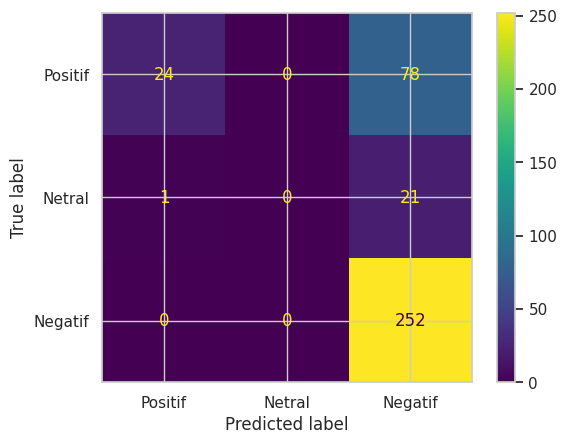

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Test_Y, predictions_NB)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positif', 'Netral', 'Negatif'])
cm.plot()

In [109]:
end_time = time.time()

execution_time = end_time - start_time
print(f"Waktu eksekusi: {execution_time} detik")

Waktu eksekusi: 182.0904438495636 detik
